# Deploy

**Note the max blob size is INT_MAX ~ 2GB**


In [1]:
import sys
import numpy as np
import os

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
sys.path.insert(0, '/home/nathan/caffe-segnet-crf/python')
import caffe
caffe.set_mode_gpu()

In [ ]:
netdef = '/home/nathan/caffe-segnet-crf/notebooks/deploy-SegNet-CRFRNN.prototxt'
weight = '/home/nathan/mzmo/analysis/nuclear_seg/weights/finetune_crfrnn_iter_15775.caffemodel'
net = caffe.Net(netdef, weight, caffe.TEST)

In [4]:
for key in net.blobs.iterkeys():
    print key, net.blobs[key].data.shape


data (1, 3, 512, 512)
data_data_0_split_0 (1, 3, 512, 512)
data_data_0_split_1 (1, 3, 512, 512)
norm (1, 3, 512, 512)
conv1 (1, 64, 512, 512)
pool1 (1, 64, 256, 256)
pool1_mask (1, 64, 256, 256)
conv2 (1, 64, 256, 256)
pool2 (1, 64, 128, 128)
pool2_mask (1, 64, 128, 128)
conv3 (1, 64, 128, 128)
pool3 (1, 64, 64, 64)
pool3_mask (1, 64, 64, 64)
upsample3 (1, 64, 128, 128)
conv_decode3 (1, 64, 128, 128)
upsample2 (1, 64, 256, 256)
conv_decode2 (1, 64, 256, 256)
upsample1 (1, 64, 512, 512)
conv_decode1 (1, 64, 512, 512)
conv_classifier (1, 2, 512, 512)
unary (1, 2, 512, 512)
Q0 (1, 2, 512, 512)
crfrnn (1, 2, 512, 512)


In [13]:
import cv2
import numpy as np

imgpath = '/home/nathan/mzmo/data/nuclei/nuclei_seg_0.1/_feature/SP 04-1514 2 L3_001(5+4)_13_1.tif'
img = cv2.imread(imgpath)
img = cv2.resize(img, dsize=(512, 512))
img = img.transpose((2,0,1))
img = np.expand_dims(img, 0)
print img.shape

# net.blobs['data'].data[...] = img

(1, 3, 512, 512)


In [14]:
_ = net.forward(data=img, end='crfrnn')

In [15]:
print net.blobs['crfrnn'].data.shape

(1, 2, 512, 512)


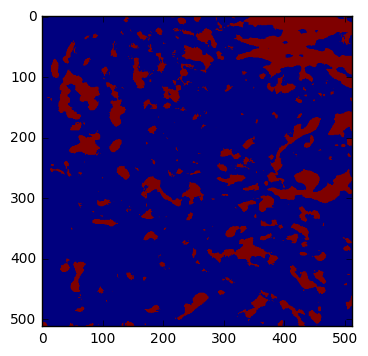

In [16]:
plt.imshow(np.argmax(np.squeeze(net.blobs['crfrnn'].data[0,:,:,:]), axis=0))

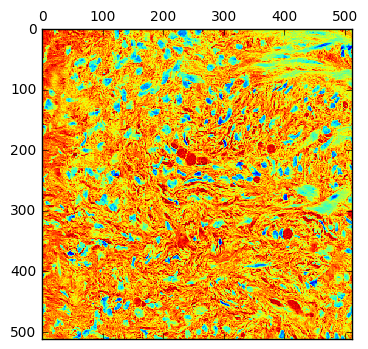

In [17]:
plt.matshow(np.squeeze(net.blobs['data'].data[0,0,:,:]))

In [12]:
net.forward(data=img)

Exception: Input blob arguments do not match net inputs.

In [6]:
d = net.blobs['data'].data
l = net.blobs['label'].data
o = net.blobs['crfrnn'].data
print d.shape
print l.shape
print o.shape

(1, 3, 128, 128)
(1, 1, 128, 128)
(1, 2, 128, 128)


[]

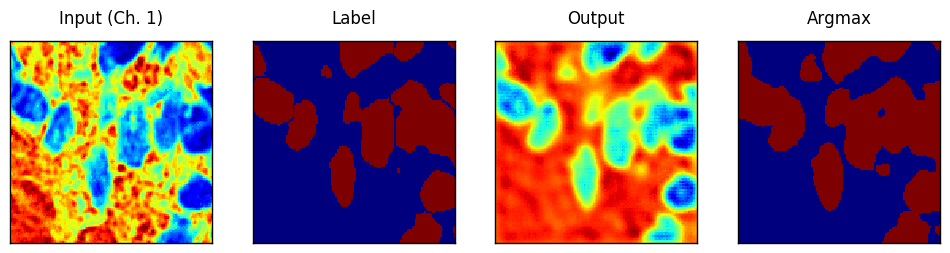

In [13]:
fig, ax = plt.subplots(1,4, figsize=(12,3))

index = np.random.randint(d.shape[0])
ax[0].matshow(np.squeeze(d[index,0,:,:])); ax[0].set_title('Input (Ch. 1)')
ax[0].set_xticks([]); ax[0].set_yticks([])
ax[1].matshow(np.squeeze(l[index,0,:,:])); ax[1].set_title('Label')
ax[1].set_xticks([]); ax[1].set_yticks([])
ax[2].matshow(np.squeeze(o[index,0,:,:])); ax[2].set_title('Output')
ax[2].set_xticks([]); ax[2].set_yticks([])
ax[3].matshow(np.argmax(np.squeeze(o[index,:,:,:]), axis=0)); ax[3].set_title('Argmax')
ax[3].set_xticks([]); ax[3].set_yticks([])

(1, 3, 128, 128)
(1, 1, 128, 128)
(1, 2, 128, 128)


[]

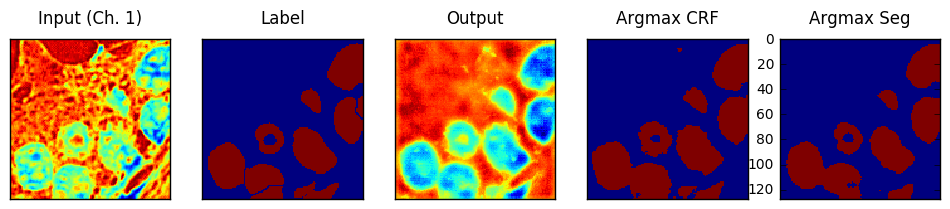

In [27]:
fig, ax = plt.subplots(1,5, figsize=(12,3))

net.forward()
d = net.blobs['data'].data
l = net.blobs['label'].data
s = net.blobs['conv_classifier'].data
o = net.blobs['crfrnn'].data
print d.shape
print l.shape

print o.shape
index = np.random.randint(d.shape[0])
ax[0].matshow(np.squeeze(d[index,0,:,:])); ax[0].set_title('Input (Ch. 1)')
ax[0].set_xticks([]); ax[0].set_yticks([])
ax[1].matshow(np.squeeze(l[index,0,:,:])); ax[1].set_title('Label')
ax[1].set_xticks([]); ax[1].set_yticks([])
ax[2].matshow(np.squeeze(o[index,0,:,:])); ax[2].set_title('Output')
ax[2].set_xticks([]); ax[2].set_yticks([])
ax[3].matshow(np.argmax(np.squeeze(o[index,:,:,:]), axis=0)); ax[3].set_title('Argmax CRF')
ax[3].set_xticks([]); ax[3].set_yticks([])
ax[4].matshow(np.argmax(np.squeeze(s[index,:,:,:]), axis=0)); ax[4].set_title('Argmax Seg')
ax[4].set_xticks([]); ax[3].set_yticks([])